In [268]:
%matplotlib inline
plt.style.use('ggplot')
import pandas
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn import datasets
import pandas as pd
import numpy as np
import requests
import gmaps
from config import g_key

## Raleigh Analysis

In [269]:
raleigh_data=requests.get('https://opendata.arcgis.com/datasets/24c0b37fa9bb4e16ba8bcaa7e806c615_0.geojson').json()

In [270]:
data_set=[]
for record in raleigh_data["features"]:
    data_set.append(record["properties"])

In [303]:
df=pd.DataFrame(data_set)
df=df[["crime_category","crime_type","city","district","reported_year","reported_month","reported_dayofwk","latitude","longitude","reported_day","reported_hour"]]
df

,crime_category,crime_type,city,district,reported_year,reported_month,reported_dayofwk,latitude,longitude,reported_day,reported_hour
0,MISCELLANEOUS,,RALEIGH,North,2017,12,Monday,0.000000,0.000000,25,20
1,MISCELLANEOUS,,RALEIGH,North,2015,5,Monday,0.000000,0.000000,25,2
2,MISCELLANEOUS,,RALEIGH,North,2018,2,Tuesday,0.000000,0.000000,13,14
3,ALL OTHER OFFENSES,,RALEIGH,Downtown,2015,8,Saturday,0.000000,0.000000,1,20
4,MISCELLANEOUS,,RALEIGH,North,2014,10,Friday,0.000000,0.000000,24,16
...,...,...,...,...,...,...,...,...,...,...,...
295384,ALL OTHER OFFENSES,,RALEIGH,Downtown,2020,3,Friday,35.777422,-78.636626,13,7
295385,DISORDERLY CONDUCT,,RALEIGH,Downtown,2020,3,Friday,35.777422,-78.636626,13,7
295386,MV THEFT,CRIMES AGAINST PROPERTY,RALEIGH,Southeast,2020,3,Friday,35.734745,-78.612499,13,7
295387,LARCENY FROM MV,CRIMES AGAINST PROPERTY,RALEIGH,Northeast,2020,3,Friday,35.848588,-78.575152,13,9


### The Types of  Crime Analysis

In [316]:
data_chart=df[df["crime_category"]!="ALL OTHER OFFENSES"].groupby(["crime_category"])["city"].count()
data_chart

crime_category
ARSON                               293
ASSAULT                           35760
BRIBERY                               5
BURGLARY/COMMERCIAL                2433
BURGLARY/RESIDENTIAL               9550
DISORDERLY CONDUCT                 2835
DRUG VIOLATIONS                   11421
DRUGS                             22757
EMBEZZLEMENT                        959
EXTORTION                           216
FORGERY                               2
FRAUD                             18238
GAMBLING                             10
HUMAN TRAFFICKING                    79
HUMANE                             7100
JUVENILE                           1267
KIDNAPPING                          249
LARCENY                           30961
LARCENY FROM MV                   18461
LIQUOR LAW VIOLATIONS               943
MISCELLANEOUS                     66158
MURDER                              134
MV THEFT                           5301
OBSCENE MATERIAL                    201
PROSTITUTION             

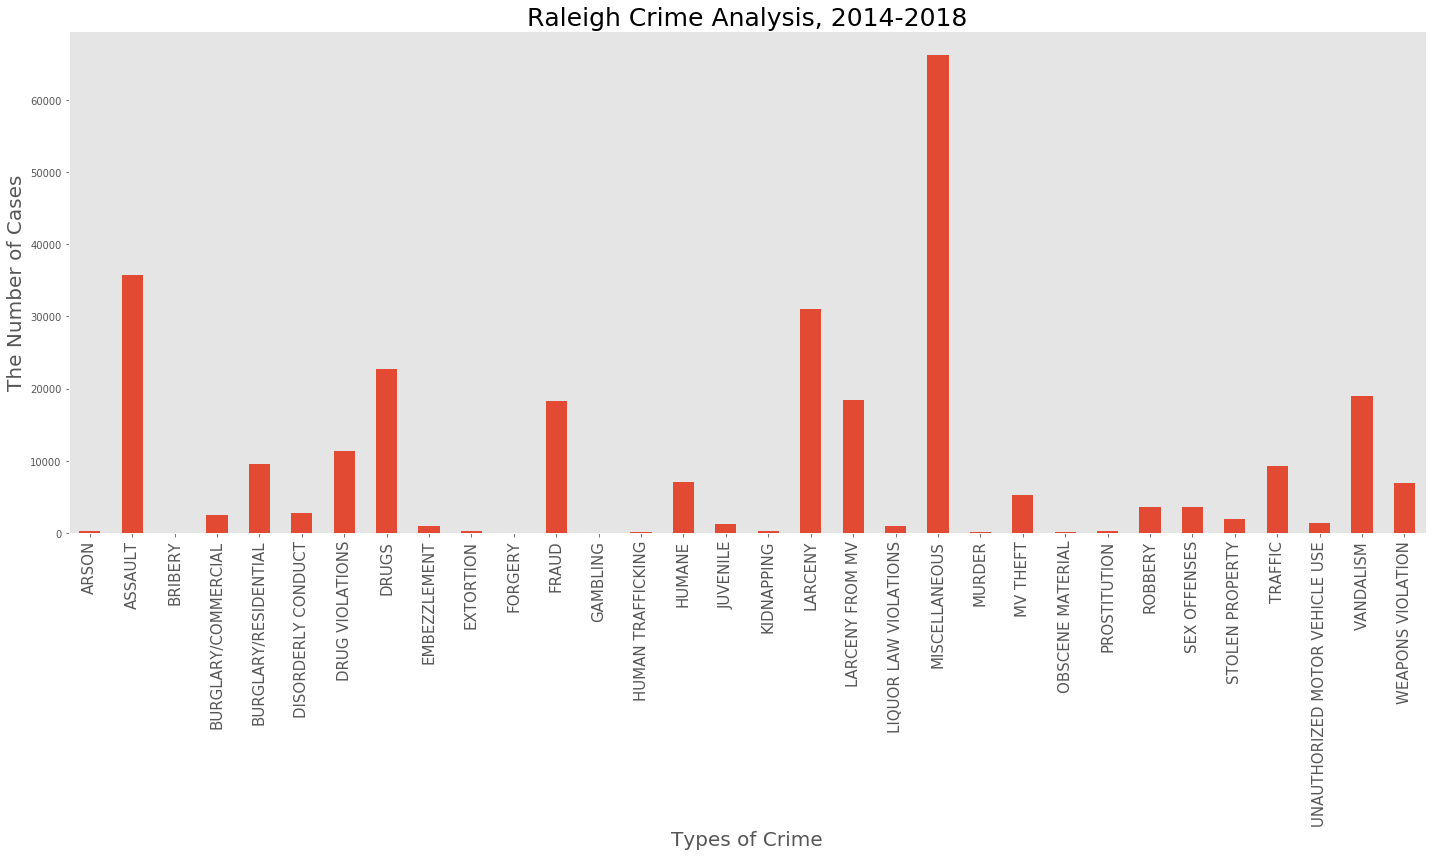

In [317]:
data_chart=data_chart.plot(kind="bar",figsize=(20,12))
plt.title("Raleigh Crime Analysis, 2014-2018",fontSize=25)
plt.xticks(fontSize=15)
plt.xlabel("Types of Crime",fontSize=20)
plt.ylabel("The Number of Cases",fontSize=20)
#tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations, ["Java", "C++", "Python", "Ruby", "Clojure"])
#plt.xlim(-1,len(crime_chart))
plt.grid()
plt.tight_layout()
plt.savefig("./images/types_crimes.png")
plt.show()



### Types of Crime vs Raleigh Districts

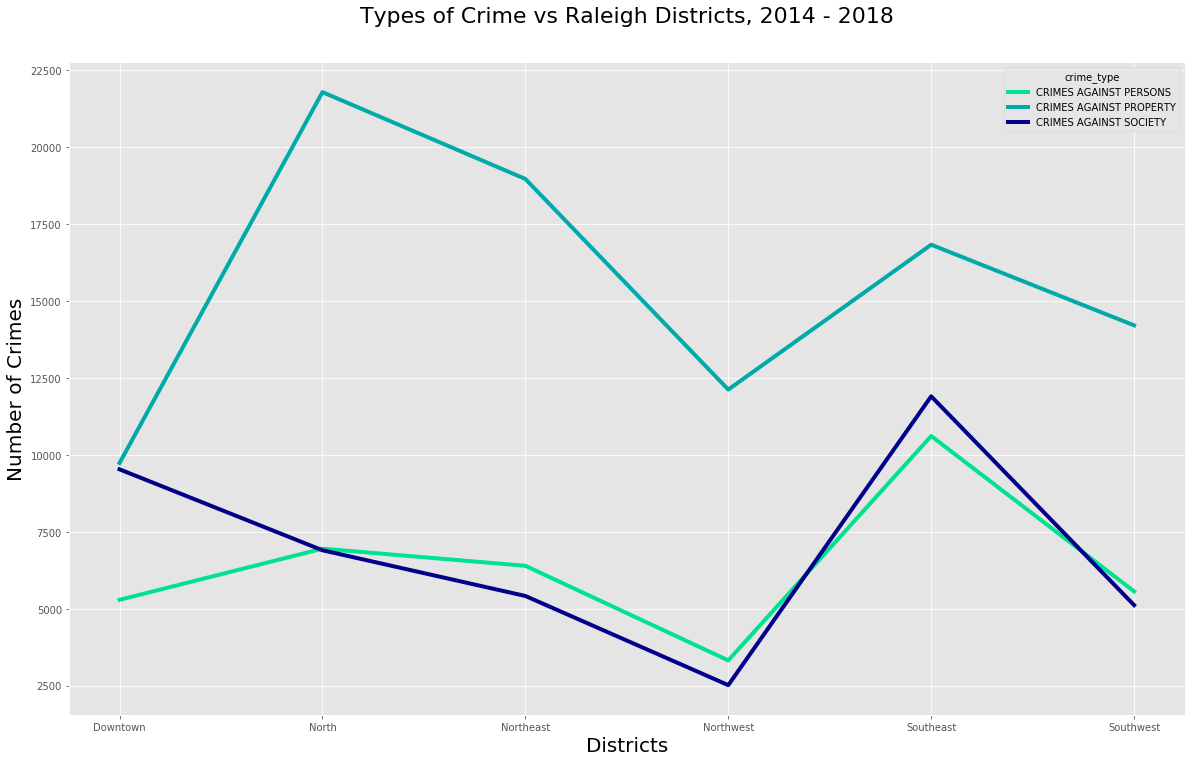

In [307]:
district_df=df[(df["crime_type"]!='') & (df["district"]!='UNK')].groupby(['district','crime_type']).count()['reported_year'].unstack().plot(figsize=(20,12),linewidth=4,color=['#00E28E','#00AAAA','darkblue'])

title=plt.title('Types of Crime vs Raleigh Districts, 2014 - 2018', fontsize=22, pad=40)
xlabel=plt.xlabel('Districts', fontsize=20, color='black')
ylabel=plt.ylabel('Number of Crimes', fontsize=20, color='black')
# plt.ylim(180,800)

plt.savefig("./images/districts_crime.png")


In [287]:
day_graph=df.groupby(["reported_hour"])["crime_category"].count().reset_index()
day_graph.head()

,reported_hour,crime_category
0,0,11260
1,1,10227
2,2,9294
3,3,7017
4,4,4799


### Number of Cases Based on Reportes Hour

0.6451618260571763


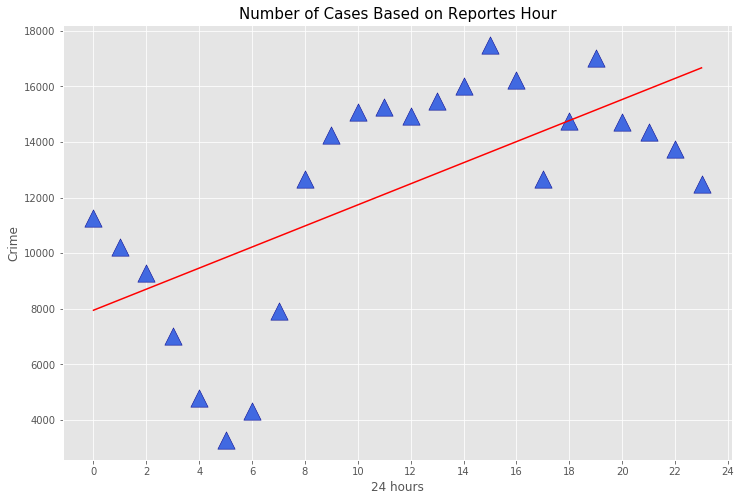

In [315]:
x_values = day_graph['reported_hour']
y_values = day_graph['crime_category']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.figure(figsize=(12,8)) 
plt.scatter(x_values, y_values, s=[300], color='royalblue', edgecolors='darkblue',  marker='^')
plt.plot(x_values,regress_values,"r-")
plt.title("Number of Cases Based on Reportes Hour",fontsize=15)

plt.xlabel('24 hours',fontsize=12)
plt.ylabel('Crime',fontsize=12)
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22,24])
#plt.xlim(min(day_graph['reported_hour']-1),max(day_graph['reported_hour'])+4)
#plt.ylim(min(day_graph['crime_category']),max(day_graph['crime_category'])+5)
#plt.grid()
print(rvalue)
plt.savefig("./images/number_crimes.png")
plt.show()


In [115]:
map_df=df.groupby(["latitude","longitude"]).count().reset_index()
map_df=map_df.loc[1:,:]
map_df

,latitude,longitude,crime_category,reported_block_address,city,district,reported_year,reported_month,reported_dayofwk,reported_day,reported_hour,reported_dayofwk_num
1,35.566713,-78.811566,1,1,1,1,1,1,1,1,1,1
2,35.580871,-78.630808,1,1,1,1,1,1,1,1,1,1
3,35.592437,-78.782495,1,1,1,1,1,1,1,1,1,1
4,35.605223,-78.747940,1,1,1,1,1,1,1,1,1,1
5,35.607088,-78.746024,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
48610,35.976081,-78.504792,1,1,1,1,1,1,1,1,1,1
48611,35.985463,-78.623040,1,1,1,1,1,1,1,1,1,1
48612,35.991176,-78.518124,1,1,1,1,1,1,1,1,1,1
48613,36.004805,-78.521161,1,1,1,1,1,1,1,1,1,1


### Google Map Analys


In [305]:
gmaps.configure(api_key=g_key)

locations=map_df[["latitude","longitude"]]
weight=map_df["crime_category"].astype(float)
# Add Heatmap layer to map

fig=gmaps.figure(center=(44.0,-6.0),zoom_level=2)

heat_layer = gmaps.heatmap_layer(locations, weights=weight, 
                                 dissipating=False, max_intensity=np.max(weight),
                                 point_radius=0.01)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))